# Modelling Two Duotransits (TOI2076)

In [16]:
%load_ext autoreload
%autoreload 2

from MonoTools.MonoTools import fit,tools
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Getting the lightcurve, and forcing it to use raw flux, as the PDC detrending is compromised:

In [17]:
lc, hdr = tools.openLightCurve(27491137, 'tess', force_raw_flux=True)
#Make sure force_raw_flux=False for the majority of other cases

https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py?Entry=<SkyCoord (ICRS): (ra, dec) in deg
    (217.392, 39.7904)>
[16, 23] <class 'list'>
TESS file
16238
1610 points masked in lc of 17765
TESS file
13429
5915 points masked in lc of 19279


#### Creating the MonoTools model:

In [18]:
model = fit.monoModel(27491137, 'tess', lc=lc)

In [19]:
# Adding stellar parameters:
model.init_starpars(Rstar=np.array([0.77,0.045,0.045]),rhostar=np.array([2.66/1.41,0.64/1.41,0.64/1.41]),
                    Teff=np.array([5163,124,124]),logg=np.array([4.6,0.086,0.086]),FeH=0.0)

#### Adding each of the inner planets:

In [20]:
model.add_planet('multi',{'tcen':1743.7199,'period':10.356192390280784,'period_err':0.005,
                          'tdur':3.3/24,'depth':1.2e-3,'b':0.4},'00')

In [21]:
model.add_planet('duo',{'tcen':1748.6958050241742,'tcen_2':1937.821199104365,
                        'tdur':4/24,'depth':2e-3,'b':0.8},'01')

108 points in transit


In [22]:
model.add_planet('duo',{'tcen':1762.6651396199247,'tcen_2':1938.2899096646295,
                        'tdur':4/24,'depth':2e-3,'b':0.8},'02')

108 points in transit


In [23]:
model.planets

{'00': {'tcen': 1743.7199,
  'period': 10.356192390280784,
  'period_err': 0.005,
  'tdur': 0.13749999999999998,
  'depth': 0.0012,
  'b': 0.4,
  'ror': 0.034641016151377546,
  'log_ror': -3.3627168610940914,
  'r_pl': 0.29874412328947997},
 '01': {'tcen': 1748.6958050241742,
  'tcen_2': 1937.821199104365,
  'tdur': 0.16666666666666666,
  'depth': 0.002,
  'b': 0.8,
  'ror': 0.044721359549995794,
  'log_ror': -3.1073040492110957,
  'r_pl': 0.3856770047591637,
  'period_err': 999,
  'period': 189.12539408019074,
  'period_int_aliases': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
  'period_aliases': array([189.12539408,  94.56269704,  63.04179803,  47.28134852,
          37.82507882,  31.52089901,  27.01791344,  23.64067426,
          21.01393268,  18.91253941,  17.19321764]),
  'P_min': 17.193217643653703},
 '02': {'tcen': 1762.6651396199247,
  'tcen_2': 1938.2899096646295,
  'tdur': 0.16666666666666666,
  'depth': 0.002,
  'b': 0.8,
  'ror': 0.044721359549995794,
  

['t2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2']
['t2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'
 't2' 't2' 't2' 't2' 't2' 't2' 't2' 't2'

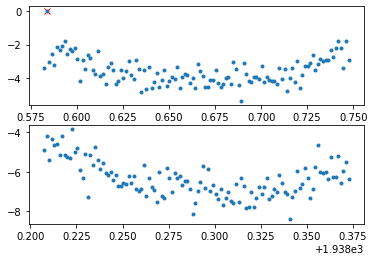

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#Finding time around each transit:
trans1=abs(model.lc['time']-1762.665)<2/24
trans2=abs(model.lc['time']-1938.29)<2/24

plt.subplot(211)
plt.plot(model.lc['time'][trans1*~model.lc['mask']],model.lc['flux'][trans1*~model.lc['mask']],'xr')
plt.plot(model.lc['time'][trans1],model.lc['flux'][trans1],'.')
print(model.lc['cadence'][trans1*model.lc['mask']])
plt.subplot(212)
plt.plot(model.lc['time'][trans2*~model.lc['mask']],model.lc['flux'][trans2*~model.lc['mask']],'xr')
plt.plot(model.lc['time'][trans2],model.lc['flux'][trans2],'.')
print(model.lc['cadence'][trans2*model.lc['mask']])

#### Initialising the model:

In [46]:
model.init_model(use_GP=True,bin_oot=False)

3 planets | monos: [] multis: ['00'] duos: ['01', '02'] use GP= True
7446 points in new lightcurve, compared to  29519  in original mask, leaving  8237 points in the lc
False making tele_index
[1.5492296]
34123 35422
['t2']
['t2'] ['t2'] [] [1.5492296] 34123
True 0.05 216.2345917005598 0.14528631283658117 8.00689101091912
0.5348921 4.233625 0.010998249053955078 4.359051704406738
True 0.08137061629162322


optimizing logp for variables: [mean, w0, power, logs2]


message: Optimization terminated successfully.
logp: -5.439186975363581 -> -5.254647381480887


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, w0, logs2, mean]
Sampling 4 chains, 0 divergences: 100%|██████████| 5976/5976 [00:01<00:00, 3584.12draws/s]


Forming Pymc3 model with: monos: [] multis: ['00'] duos: ['01', '02']
init periods: [10.35619239] [0.005]
-6.907755278982137 -> -1.3862943611198906 rors: [-5.63906798]
[1.5492296] 6938 / 8237
[False False False ... False False False] [False False False ... False False False] [False False False ...  True False False]
generating multi lcs:
summing multi lcs:
#Marginalising over  11  period aliases for  01
#Marginalising over  7  period aliases for  02
{'name': '01', 'n_points': 240, 'durs': duo_tdurs_01
array([0.23910077, 0.1897744 , 0.1657832 , 0.15062402, 0.13982694,
       0.13158218, 0.12499178, 0.11955032, 0.11494759, 0.11098067,
       0.10751022]), 'pers': duo_periods_01
array([189.12539408,  94.56269704,  63.04179803,  47.28134852,
        37.82507882,  31.52089901,  27.01791344,  23.64067426,
        21.01393268,  18.91253941,  17.19321764]), 'len': 11, 'range': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'lcs': Sum{axis=[2], acc_dtype=float64}.0
array([[0., 0., 0., ...

optimizing logp for variables: [power, w0, logs2, mean, u_star_tess, multi_omegas, multi_eccs, multi_bs, multi_logrors, multi_t0s, multi_periods, duo_omegas_02, duo_eccs_02, duo_bs_02, duo_logrors_02, duo_t0_2s_02, duo_t0s_02, duo_omegas_01, duo_eccs_01, duo_bs_01, duo_logrors_01, duo_t0_2s_01, duo_t0s_01, Rs, logrho_S]


message: Desired error not necessarily achieved due to precision loss.
logp: -16879.510702166517 -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model



before logrho_S                     0.51
Rs                           2.18
duo_t0s_01_interval__       -0.70
duo_t0_2s_01_interval__     -0.70
duo_logrors_01_interval__   -1.61
duo_bs_01_impact__          -1.82
duo_eccs_01_interval__      -4.08
duo_omegas_01_angle__       -0.50
duo_t0s_02_interval__       -0.70
duo_t0_2s_02_interval__     -0.70
duo_logrors_02_interval__   -1.61
duo_bs_02_impact__          -1.82
duo_eccs_02_interval__      -4.08
duo_omegas_02_angle__       -0.50
multi_periods                4.38
multi_t0s_interval__         0.69
multi_logrors_interval__    -1.73
multi_bs_impact__           -1.43
multi_eccs_interval__       -4.08
multi_omegas_angle__        -0.50
u_star_tess_interval__       0.89
mean                        -2.35
logs2                       -1.61
w0_interval__               -1.13
power_interval__            -0.93
Name: Log-probability of test_point, dtype: float64


optimizing logp for variables: [duo_bs_02, duo_logrors_02, duo_bs_01, duo_logrors_01, multi_bs, multi_logrors]


message: Optimization terminated successfully.
logp: -16879.510702166514 -> -16826.886561715033
optimizing logp for variables: [duo_t0_2s_02, duo_t0s_02, duo_t0_2s_01, duo_t0s_01, multi_periods]


message: Desired error not necessarily achieved due to precision loss.
logp: -16826.886561715033 -> -16826.427774892778
optimizing logp for variables: [duo_omegas_02, duo_eccs_02, duo_t0_2s_02, duo_t0s_02, duo_bs_02, duo_logrors_02, duo_omegas_01, duo_eccs_01, duo_t0_2s_01, duo_t0s_01, duo_bs_01, duo_logrors_01, multi_omegas, multi_eccs, multi_t0s, multi_bs, multi_logrors, logrho_S]


message: Desired error not necessarily achieved due to precision loss.
logp: -16826.427774892778 -> -16764.86610756059
optimizing logp for variables: [mean, w0, power, logs2]


message: Desired error not necessarily achieved due to precision loss.
logp: -16764.86610756059 -> -6667.231054060837
optimizing logp for variables: [duo_t0_2s_02, duo_t0s_02, duo_bs_02, duo_logrors_02, duo_t0_2s_01, duo_t0s_01, duo_bs_01, duo_logrors_01, multi_periods, multi_bs, multi_logrors]


message: Desired error not necessarily achieved due to precision loss.
logp: -6667.2310540608405 -> -6655.990325786119
optimizing logp for variables: [u_star_tess, logrho_S, Rs, logs2, mean, w0, power, duo_omegas_02, duo_eccs_02, duo_t0_2s_02, duo_t0s_02, duo_bs_02, duo_logrors_02, duo_omegas_01, duo_eccs_01, duo_t0_2s_01, duo_t0s_01, duo_bs_01, duo_logrors_01, multi_omegas, multi_eccs, multi_t0s, multi_bs, multi_logrors]


message: Desired error not necessarily achieved due to precision loss.
logp: -6655.990325786119 -> -6655.065318164959


after logrho_S                     0.51
Rs                           2.18
duo_t0s_01_interval__       -0.70
duo_t0_2s_01_interval__     -0.70
duo_logrors_01_interval__   -1.61
duo_bs_01_impact__          -1.82
duo_eccs_01_interval__      -4.08
duo_omegas_01_angle__       -0.50
duo_t0s_02_interval__       -0.70
duo_t0_2s_02_interval__     -0.70
duo_logrors_02_interval__   -1.61
duo_bs_02_impact__          -1.82
duo_eccs_02_interval__      -4.08
duo_omegas_02_angle__       -0.50
multi_periods                4.38
multi_t0s_interval__         0.69
multi_logrors_interval__    -1.73
multi_bs_impact__           -1.43
multi_eccs_interval__       -4.08
multi_omegas_angle__        -0.50
u_star_tess_interval__       0.89
mean                        -2.35
logs2                       -1.61
w0_interval__               -1.13
power_interval__            -0.93
Name: Log-probability of test_point, dtype: float64


In [49]:
model.GetSavename(how='save',overwrite=None)

/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137*model.pickle
['/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2020-10-06_0_model.pickle'] [85]
['/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2020-10-06_0_model.pickle']


#### Plotting the minimised model:

[0.47955874 0.52044126] [ 0 12 24] 32 range(0, 2)


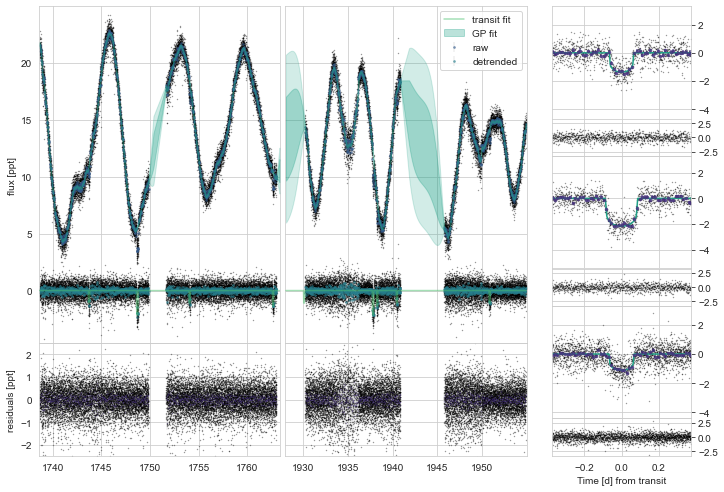

In [50]:
model.Plot(interactive=False, n_samp=1)

#### Looks good. Let's run the Mcmc

(This took 20 hours for 800 samples, ouf)

In [52]:
model.RunMcmc(n_draws=800)

['/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2020-10-19_1', '/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137'] False
LOADED MCMC
<class 'dict'>
dict_keys(['logrho_S', 'Rs', 'duo_t0s_01_interval__', 'duo_t0_2s_01_interval__', 'duo_logrors_01_interval__', 'duo_bs_01_impact__', 'duo_eccs_01_interval__', 'duo_omegas_01_angle__', 'duo_t0s_02_interval__', 'duo_t0_2s_02_interval__', 'duo_logrors_02_interval__', 'duo_bs_02_impact__', 'duo_eccs_02_interval__', 'duo_omegas_02_angle__', 'multi_periods', 'multi_t0s_interval__', 'multi_logrors_interval__', 'multi_bs_impact__', 'multi_eccs_interval__', 'multi_omegas_angle__', 'u_star_tess_interval__', 'mean', 'logs2', 'w0_interval__', 'power_interval__', 'rho_S', 'Ms', 'duo_t0s_01', 'duo_t0_2s_01', 'duo_periods_01', 'duo_logrors_01', 'duo_bs_01', 'duo_eccs_01', 'duo_omegas_01', 'duo_t0s_02', 'duo_t0_2s_02', 'duo_periods_02', 'duo_logrors_02', 'duo_bs_02', 'duo_eccs_02', 'duo_omegas_02', 'multi_t0s', 'multi_logrors', 'mul

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [power, w0, logs2, mean, u_star_tess, multi_omegas, multi_eccs, multi_bs, multi_logrors, multi_t0s, multi_periods, duo_omegas_02, duo_eccs_02, duo_bs_02, duo_logrors_02, duo_t0_2s_02, duo_t0s_02, duo_omegas_01, duo_eccs_01, duo_bs_01, duo_logrors_01, duo_t0_2s_01, duo_t0s_01, Rs, logrho_S]
Sampling 4 chains, 80 divergences: 100%|██████████| 5312/5312 [19:44:22<00:00, 13.38s/draws]   
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8293245796806806, but should be close to 0.9. Try to increase the number of tuning steps.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.824592981418708, but should be close to 0.9. Try to increase the number of tuning steps.
There were

#### Saving the model and creating various plots:

In [53]:
model.SaveModelToFile()

In [67]:
#Interactive plot:
model.Plot(n_samp=9, interactive=True)

/Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2020-10-19_1_model_plot.html
interactive table at: /Volumes/LUVOIR/MonoToolsData/TIC00027491137/TIC00027491137_2020-10-19_1_model_plot.html


[0.47955874 0.52044126] [ 0 12 24] 32 range(0, 2)


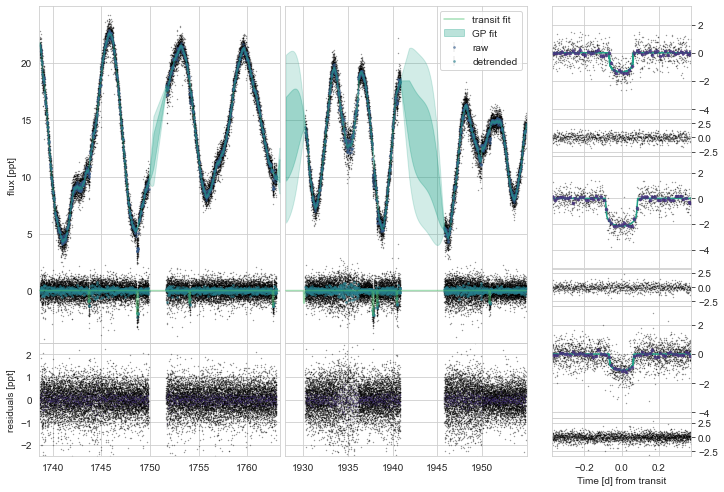

In [63]:
#PDF plot:
model.Plot(n_samp=9, plottype='pdf')

-480.5092491275482
-122.79765429696499


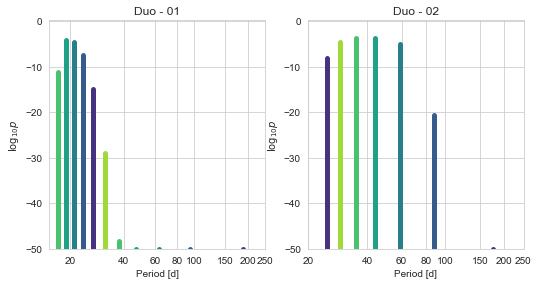

In [73]:
#Period plot:
model.PlotPeriods(log=True,ymin=-50,xlog=True)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat,5%,-$1\sigma$,median,+$1\sigma$,95%,name
Rs[0],0.771,0.044,0.689,0.850,0.001,0.001,2079.0,2079.0,2068.0,1522.0,1.00,0.700,0.727,0.772,0.814,0.841,Rs[0]
multi_periods[0],10.356,0.000,10.356,10.356,0.000,0.000,2599.0,2599.0,2644.0,1858.0,1.00,10.356,10.356,10.356,10.356,10.356,multi_periods[0]
logs2[0],-1.088,0.017,-1.120,-1.056,0.000,0.000,3002.0,2989.0,3008.0,1927.0,1.00,-1.116,-1.105,-1.088,-1.071,-1.059,logs2[0]
rho_S,2.272,0.380,1.596,2.925,0.015,0.011,642.0,630.0,636.0,1149.0,1.01,1.643,1.884,2.268,2.679,2.845,rho_S
Ms[0],0.748,0.182,0.416,1.087,0.006,0.004,884.0,857.0,910.0,1033.0,1.01,0.480,0.569,0.728,0.930,1.079,Ms[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dist_in_trans_02[6],30.816,5.848,15.458,39.245,0.451,0.320,168.0,168.0,335.0,144.0,1.02,17.181,27.824,31.910,35.025,37.325,dist_in_trans_02[6]
period_marg_01,22.568,5.144,17.194,31.522,0.280,0.204,338.0,320.0,454.0,290.0,1.01,17.194,17.912,21.014,27.019,31.522,period_marg_01
tdur_marg_01,0.175,0.002,0.171,0.178,0.000,0.000,1029.0,1024.0,1157.0,1150.0,1.01,0.172,0.173,0.175,0.176,0.178,tdur_marg_01
period_marg_02,49.365,20.901,25.381,87.817,1.086,0.812,371.0,332.0,470.0,739.0,1.01,25.231,28.674,43.694,86.419,87.811,period_marg_02


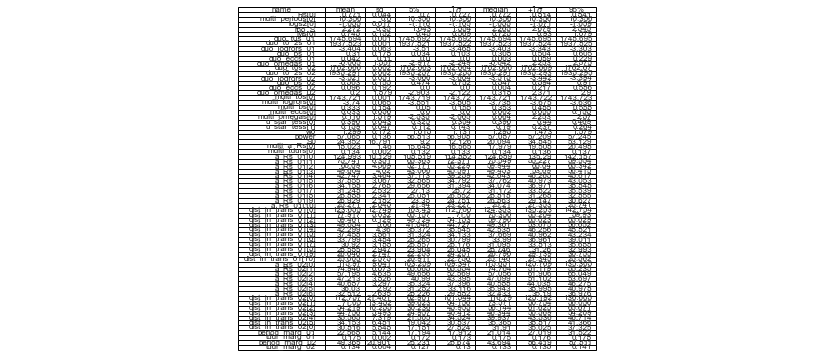

In [65]:
#Getting the table of output model parameters:
df=model.PlotTable(return_table=True)

In [79]:
#Plotting the table:
df.loc[[var for var in df.index if "a_Rs_0" not in var and "dist_in_trans_0" not in var]].to_csv("TOI2076_mcmc_outputs.csv")

In [91]:
t0s=[model.trace['duo_t0_2s_01'],model.trace['duo_t0_2s_02']]
pers=[model.trace['duo_periods_01'],model.trace['duo_periods_02']]
durs=[model.trace['duo_tdurs_01'],model.trace['duo_tdurs_02']]
probs=[model.trace['logprob_marg_01'],model.trace['logprob_marg_02']]

multi_t0=[model.trace['multi_t0s']]
multi_tdur=[model.trace['multi_tdurs']]
multi_per=[model.trace['multi_periods']]